In [3]:
import pandas as pd
import numpy as np

Problem - 1: Perform a classification task with knn from scratch.
1. Load the Dataset:
• Read the dataset into a pandas DataFrame.

In [4]:
df = pd.read_csv('/content/drive/MyDrive/ConceptAndTechnologiesOfAI/week4/diabetes.csv');
df.head(3)

,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn
0,1000,203.0,82,56.0,3.6,4.31,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,NaN,NaN,29.0,38.0,720.0
1,1001,165.0,97,24.0,6.9,4.44,Buckingham,29,female,64.0,218.0,large,112.0,68.0,NaN,NaN,46.0,48.0,360.0
2,1002,228.0,92,37.0,6.2,4.64,Buckingham,58,female,61.0,256.0,large,190.0,92.0,185.0,92.0,49.0,57.0,180.0


• Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset
(e.g., check data types, missing values, summary statistics).

In [5]:
#  Finding all datas
print(df.info())

print()## for spaces

# Finding Missing values
print(df.isnull().sum())

print()

# Finding Summary statistics
print(df.describe(include="all"))

print()

# Finding Shape
print(df.shape)

print()

# 6. finding names
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        403 non-null    int64  
 1   chol      402 non-null    float64
 2   stab.glu  403 non-null    int64  
 3   hdl       402 non-null    float64
 4   ratio     402 non-null    float64
 5   glyhb     390 non-null    float64
 6   location  403 non-null    object 
 7   age       403 non-null    int64  
 8   gender    403 non-null    object 
 9   height    398 non-null    float64
 10  weight    402 non-null    float64
 11  frame     391 non-null    object 
 12  bp.1s     398 non-null    float64
 13  bp.1d     398 non-null    float64
 14  bp.2s     141 non-null    float64
 15  bp.2d     141 non-null    float64
 16  waist     401 non-null    float64
 17  hip       401 non-null    float64
 18  time.ppn  400 non-null    float64
dtypes: float64(13), int64(3), object(3)
memory usage: 59.9+ KB
None

id    

2. Handle Missing Data:

• Handle any missing values appropriately, either by dropping or imputing them based on the data.

In [6]:
df.isnull().sum()#find missing data

,0
id,0
chol,1
stab.glu,0
hdl,1
ratio,1
glyhb,13
location,0
age,0
gender,0
height,5


In [7]:
df = df.drop(columns=["bp.2s", "bp.2d"]) #As there are too much empty values

df["frame"] = df["frame"].fillna(df["frame"].mode()[0]) #Fill in frame values as the highest repeating value ie.Mode
mapping = {"small": 0, "medium": 1, "large": 2} # Adding int value
df["frame"] = df["frame"].map(mapping)

mapping = {"male": 0, "female": 1} # Adding int value
df["gender"] = df["gender"].map(mapping)

# Removing location
df = df.drop(columns=["location","id","chol","stab.glu","hdl","glyhb","bp.1s", "bp.1d","time.ppn","age"])

##Enter every other column and add the median value
num_cols = ["ratio","height","weight","waist","hip"]

for col in num_cols:
    df[col] = df[col].fillna(df[col].median())
df.head()

,ratio,gender,height,weight,frame,waist,hip
0,3.6,1,62.0,121.0,1,29.0,38.0
1,6.9,1,64.0,218.0,2,46.0,48.0
2,6.2,1,61.0,256.0,2,49.0,57.0
3,6.5,0,67.0,119.0,2,33.0,38.0
4,8.9,0,68.0,183.0,1,44.0,41.0


In [8]:

df.isnull().sum()

,0
ratio,0
gender,0
height,0
weight,0
frame,0
waist,0
hip,0


3. Feature Engineering:


• Separate the feature matrix (X) and target variable (y).

• Perform a train - test split from scratch using a 70% − 30% ratio.

In [9]:
#X as everycolums except frame
# x = df.drop(columns=["frame"]).values

important_features = ["ratio", "height", "weight", "waist", "hip"]

x = df[important_features].values

#Taking frame as the y
y = df["frame"].values


In [10]:
def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
    """
    Splits dataset into train and test sets from scratch.
    """

    np.random.seed(random_seed)

    # Generate array of indices
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    # Determine test size
    test_count = int(len(X) * test_size)

    # Split indices
    test_idx = indices[:test_count]
    train_idx = indices[test_count:]

    # Create train and test sets
    X_train = X[train_idx]
    X_test = X[test_idx]
    y_train = y[train_idx]
    y_test = y[test_idx]

    #Printing the results
    print("X_train shape:", X_train.shape)
    print("X_test shape:", X_test.shape)
    print("y_train shape:", y_train.shape)
    print("y_test shape:", y_test.shape)

    return X_train, X_test, y_train, y_test

x_train, x_test, y_train, y_test = train_test_split_scratch(x, y)


X_train shape: (283, 5)
X_test shape: (120, 5)
y_train shape: (283,)
y_test shape: (120,)


4. Implement KNN:

• Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).

• Compute distances using Euclidean distance.

• Write functions for:

– Predicting the class for a single query.

– Predicting classes for all test samples.

• Evaluate the performance using accuracy.

In [11]:
def euclidean_distance(point1, point2):
    """
    Calculate the Euclidean distance between two points in n-dimensional space.

    Arguments:
    point1 : np.ndarray
        The first point as a numpy array.
    point2 : np.ndarray
        The second point as a numpy array.

    Returns:
    float
        The Euclidean distance between the two points.

    Raises:
    ValueError: If the input points do not have the same dimensionality.
    """

    if point1.shape != point2.shape:
        raise ValueError("Points must have the same dimensions to calculate Euclidean distance.")


    distance = np.sqrt(np.sum((point1 - point2) ** 2))
    return distance

euclidean_distance(x[0], x[1])

np.float64(99.06003231000523)

In [12]:
try:

    point1 = np.array([3, 4])
    point2 = np.array([0, 0])


    result = euclidean_distance(point1, point2)


    expected_result = 5.0
    assert np.isclose(result, expected_result), f"Expected {expected_result}, but got {result}"

    print("Test passed successfully!")
except ValueError as ve:
    print(f"ValueError: {ve}")
except AssertionError as ae:
    print(f"AssertionError: {ae}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


Test passed successfully!


In [13]:
def knn_predict_single(query, X_train, y_train, k=3):
    """
    Predict the class label for a single query using the K-nearest neighbors algorithm.

    Arguments:
    query : np.ndarray
        The query point for which the prediction is to be made.
    X_train : np.ndarray
        The training feature matrix.
    y_train : np.ndarray
        The training labels.
    k : int, optional
        The number of nearest neighbors to consider (default is 3).

    Returns:
    int
        The predicted class label for the query.
    """

    distances = [euclidean_distance(query, x) for x in X_train]


    sorted_indices = np.argsort(distances)


    nearest_indices = sorted_indices[:k]


    nearest_labels = y_train[nearest_indices]


    prediction = np.bincount(nearest_labels).argmax()

    return prediction

In [14]:
def knn_predict(X_test, X_train, y_train, k=3):
    """
    Predict the class labels for all test samples using the K-nearest neighbors algorithm.

    Arguments:
    X_test : np.ndarray
        The test feature matrix.
    X_train : np.ndarray
        The training feature matrix.
    y_train : np.ndarray
        The training labels.
    k : int, optional
        The number of nearest neighbors to consider (default is 3).

    Returns:
    np.ndarray
        An array of predicted class labels for the test samples.
    """

    predictions = [knn_predict_single(x, X_train, y_train, k) for x in X_test]
    return np.array(predictions)


In [15]:
try:

    X_test_sample = x_test[:5]
    y_test_sample = y_test[:5]


    predictions = knn_predict(X_test_sample, x_train, y_train, k=3)


    print("Predictions:", predictions)
    print("Actual labels:", y_test_sample)


    assert predictions.shape == y_test_sample.shape, (
        "The shape of predictions does not match the shape of the actual labels."
    )

    print("Test case passed successfully!")
except AssertionError as ae:
    print(f"AssertionError: {ae}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


Predictions: [2 1 1 2 1]
Actual labels: [1 1 1 1 2]
Test case passed successfully!


In [16]:
def compute_accuracy(y_true, y_pred):
    """
    Compute the accuracy of predictions.

    Arguments:
    y_true : np.ndarray
        The true labels.
    y_pred : np.ndarray
        The predicted labels.

    Returns:
    float
        The accuracy as a percentage (0 to 100).
    """
    correct_predictions = np.sum(y_true == y_pred)
    total_predictions = len(y_true)
    accuracy = (correct_predictions / total_predictions) * 100
    return accuracy



try:

    predictions = knn_predict(x_test, x_train, y_train, k=3)


    accuracy = compute_accuracy(y_test, predictions)


    print(f"Accuracy of the KNN model on the test set: {accuracy:.2f}%")
except Exception as e:
    print(f"An unexpected error occurred during prediction or accuracy computation: {e}")


Accuracy of the KNN model on the test set: 39.17%


In [17]:
for k in [1, 3, 5, 7, 9, 11,13,15,16,17,18,20]:
    preds = knn_predict(x_test, x_train, y_train, k)
    acc = np.mean(preds == y_test)
    print(f"k = {k} -> Accuracy = {acc*100:.2f}%")


k = 1 -> Accuracy = 43.33%
k = 3 -> Accuracy = 39.17%
k = 5 -> Accuracy = 49.17%
k = 7 -> Accuracy = 45.83%
k = 9 -> Accuracy = 46.67%
k = 11 -> Accuracy = 47.50%
k = 13 -> Accuracy = 48.33%
k = 15 -> Accuracy = 48.33%
k = 16 -> Accuracy = 52.50%
k = 17 -> Accuracy = 50.83%
k = 18 -> Accuracy = 49.17%
k = 20 -> Accuracy = 49.17%


Accuracy for k=1: 43.33%
Accuracy for k=2: 37.50%
Accuracy for k=3: 39.17%
Accuracy for k=4: 46.67%
Accuracy for k=5: 49.17%
Accuracy for k=6: 47.50%
Accuracy for k=7: 45.83%
Accuracy for k=8: 47.50%
Accuracy for k=9: 46.67%
Accuracy for k=10: 47.50%
Accuracy for k=11: 47.50%
Accuracy for k=12: 49.17%
Accuracy for k=13: 48.33%
Accuracy for k=14: 50.83%
Accuracy for k=15: 48.33%
Accuracy for k=16: 52.50%
Accuracy for k=17: 50.83%
Accuracy for k=18: 49.17%
Accuracy for k=19: 50.00%
Accuracy for k=20: 49.17%


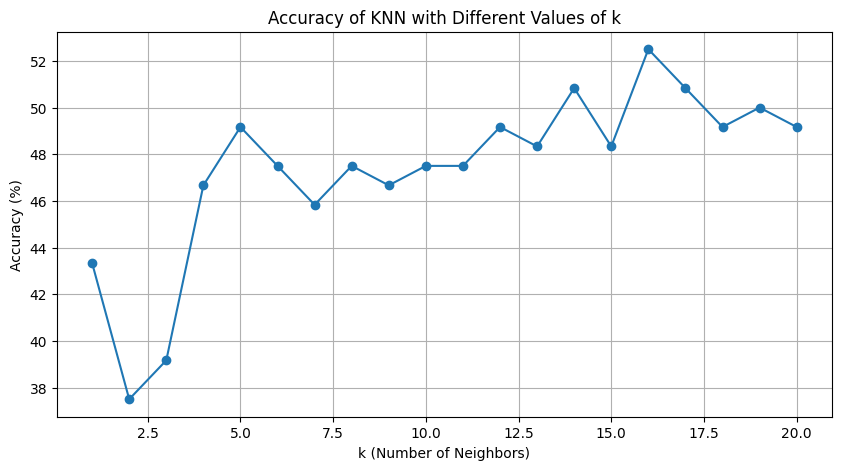

Experiment completed. Check the plot for the accuracy trend.


In [18]:
import matplotlib.pyplot as plt
def experiment_knn_k_values(X_train, y_train, X_test, y_test, k_values):
    """
    Run KNN predictions for different values of k and plot the accuracies.

    Arguments:
    X_train : np.ndarray
        The training feature matrix.
    y_train : np.ndarray
        The training labels.
    X_test : np.ndarray
        The test feature matrix.
    y_test : np.ndarray
        The test labels.
    k_values : list of int
        A list of k values to experiment with.

    Returns:
    dict
        A dictionary with k values as keys and their corresponding accuracies as values.
    """
    accuracies = {}

    for k in k_values:

        predictions = knn_predict(X_test, X_train, y_train, k=k)


        accuracy = compute_accuracy(y_test, predictions)
        accuracies[k] = accuracy

        print(f"Accuracy for k={k}: {accuracy:.2f}%")


    plt.figure(figsize=(10, 5))
    plt.plot(k_values, list(accuracies.values()), marker='o')
    plt.xlabel('k (Number of Neighbors)')
    plt.ylabel('Accuracy (%)')
    plt.title('Accuracy of KNN with Different Values of k')
    plt.grid(True)
    plt.show()

    return accuracies


k_values = range(1, 21)


try:
    accuracies = experiment_knn_k_values(x_train, y_train, x_test, y_test, k_values)
    print("Experiment completed. Check the plot for the accuracy trend.")
except Exception as e:
    print(f"An unexpected error occurred during the experiment: {e}")


Problem - 2 - Experimentation:
1. Repeat the Classification Task:
• Scale the Feature matrix X.

• Use the scaled data for training and testing the kNN Classifier.

• Record the results.

2. Comparative Analysis: Compare the Results -

• Compare the accuracy and performance of the kNN model on the original dataset from problem 1
versus the scaled dataset.

• Discuss:

– How scaling impacted the KNN performance.

– The reason for any observed changes in accuracy.

In [19]:
def min_max_scale(X):
    """
    Manually scale the feature matrix X using min-max scaling.
    Returns the scaled version of X.
    """
    X_min = X.min(axis=0)       # minimum of each column
    X_max = X.max(axis=0)       # maximum of each column

    return (X - X_min) / (X_max - X_min)

x_scaled = min_max_scale(x)
x_scaled

array([[0.11797753, 0.41666667, 0.09734513, 0.1       , 0.23529412],
       [0.3033708 , 0.5       , 0.52654867, 0.66666667, 0.52941176],
       [0.26404494, 0.375     , 0.69469027, 0.76666667, 0.79411765],
       ...,
       [0.20224719, 0.70833333, 0.30088496, 0.23333333, 0.29411765],
       [0.12921349, 0.45833333, 0.43362832, 0.5       , 0.52941176],
       [0.02808989, 0.5       , 0.53539823, 0.76666667, 0.82352941]])

In [20]:
x_train_s, x_test_s, y_train_s, y_test_s = train_test_split_scratch(x_scaled, y)


X_train shape: (283, 5)
X_test shape: (120, 5)
y_train shape: (283,)
y_test shape: (120,)


In [21]:
y_pred_scaled = knn_predict(x_test_s, x_train_s, y_train_s, k=3)
y_pred_scaled

array([0, 1, 1, 2, 1, 1, 0, 0, 1, 1, 2, 1, 2, 2, 2, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 2, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1,
       0, 0, 0, 1, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2,
       1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 2, 1, 1,
       0, 0, 1, 1, 1, 0, 2, 1, 1, 1, 0, 1, 0, 0, 1, 2, 1, 1, 0, 1, 1, 0,
       1, 0, 2, 0, 1, 2, 0, 1, 0, 1])

In [22]:
accuracy_scaled = np.mean(y_pred_scaled == y_test_s)
accuracy_scaled

np.float64(0.4)

Accuracy for k=1: 47.50%
Accuracy for k=2: 45.00%
Accuracy for k=3: 40.00%
Accuracy for k=4: 46.67%
Accuracy for k=5: 48.33%
Accuracy for k=6: 47.50%
Accuracy for k=7: 50.00%
Accuracy for k=8: 46.67%
Accuracy for k=9: 50.83%
Accuracy for k=10: 50.83%
Accuracy for k=11: 51.67%
Accuracy for k=12: 49.17%
Accuracy for k=13: 52.50%
Accuracy for k=14: 51.67%
Accuracy for k=15: 54.17%
Accuracy for k=16: 51.67%
Accuracy for k=17: 50.83%
Accuracy for k=18: 51.67%
Accuracy for k=19: 50.83%
Accuracy for k=20: 54.17%


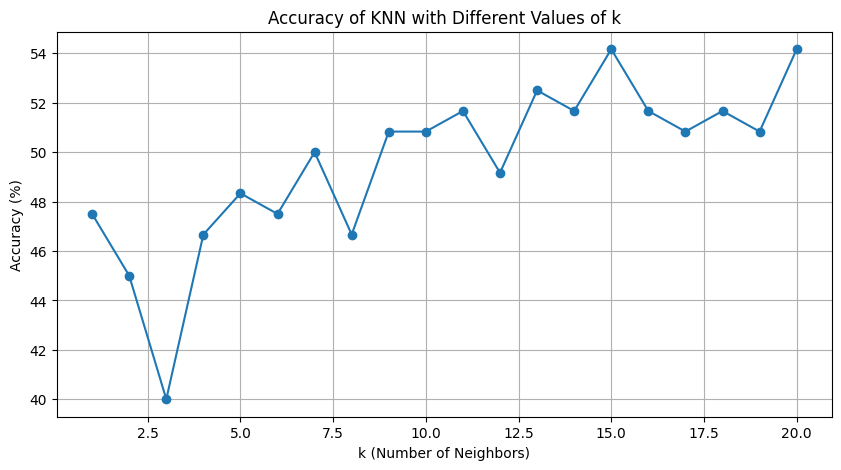

Experiment completed. Check the plot for the accuracy trend.


In [23]:
k_values = range(1, 21)


try:
    accuracies = experiment_knn_k_values(x_train_s, y_train_s, x_test_s, y_test_s, k_values)
    print("Experiment completed. Check the plot for the accuracy trend.")
except Exception as e:
    print(f"An unexpected error occurred during the experiment: {e}")


In [24]:
##Scaling improved the performance of the kNN model.
# Since kNN uses Euclidean distance, features with large values dominated the distance calculation in the unscaled data.

Before scaling  there were large valued features and the smaller features had little effect.And lower accuracy was observed

After Scaling all features were normalized to the same scale so the accuracy improved

Problem - 3 - Experimentation with k:
1. Vary the number of neighbors - k:

• Run the KNN model on both the original and scaled datasets for a range of:

k= 1, 2, 3, . . . 15

• For each k, record:

– Accuracy.

– Time taken to make predictions.

2. Visualize the Results:

• Plot the following graphs:

– k vs. Accuracy for original and scaled datasets.

– k vs. Time Taken for original and scaled datasets.

3. Analyze and Discuss:

• Discuss how the choice of k affects the accuracy and computational cost.

• Identify the optimal k based on your analysis.

In [25]:
import time

k_values = range(1, 16)

scaled_accuracy = []
unscaled_accuracy = []
time_unscaled = []
time_scaled = []

for kk in k_values:
    # Unscaled
    start = time.time()
    unscaled_pred = knn_predict(x_test, x_train, y_train, kk)
    end = time.time()

    unscaled_accuracy.append(compute_accuracy(y_test, unscaled_pred))
    time_unscaled.append(end - start)

    # Scaled
    start = time.time()
    scaled_pred = knn_predict(x_test_s, x_train_s, y_train, kk)
    end = time.time()

    scaled_accuracy.append(compute_accuracy(y_test, scaled_pred))
    time_scaled.append(end - start)


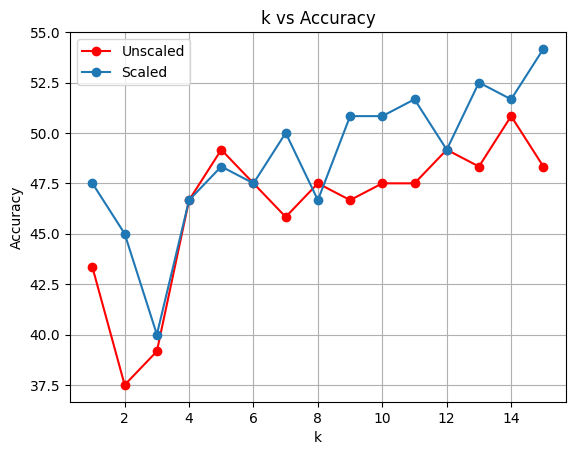

In [27]:
plt.plot(k_values, unscaled_accuracy, marker='o', label='Unscaled', color='red')
plt.plot(k_values, scaled_accuracy, marker='o', label='Scaled')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('k vs Accuracy')
plt.legend()
plt.grid(True)
plt.show()

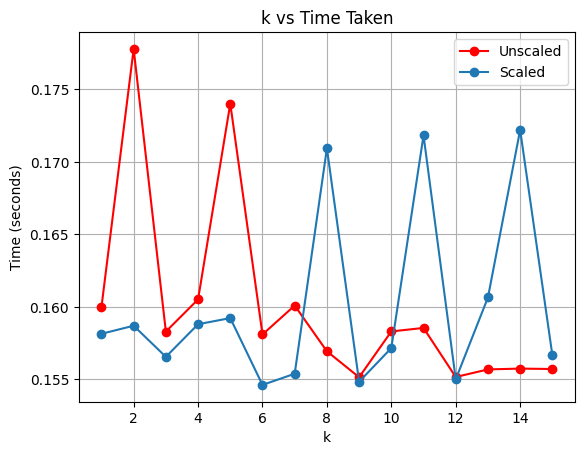

In [28]:
plt.plot(k_values, time_unscaled, marker='o', label='Unscaled', color='red')
plt.plot(k_values, time_scaled, marker='o', label='Scaled')
plt.xlabel('k')
plt.ylabel('Time (seconds)')
plt.title('k vs Time Taken')
plt.legend()
plt.grid(True)
plt.show()


The accuracy of the KNN model is low and unstable for small values of k because the model is sensitive to noise. As k increases, accuracy improves since predictions are based on more neighbors, making them more stable. The scaled dataset consistently performs better than the unscaled dataset because scaling ensures fair distance calculations. The prediction time remains almost constant for all values of k, so increasing k does not significantly increase computational cost. Based on the plots, the optimal value of k lies around 13–15, where the scaled data achieves the highest accuracy with reasonable computation time.

Problem - 4 - Additional Questions {Optional - But Highly Recommended}:
• Discuss the challenges of using KNN for large datasets and high-dimensional data.
• Suggest strategies to improve the efficiency of KNN (e.g., approximate nearest neighbors, dimensionality
reduction).

Challenges of using KNN for large datasets and high-dimensional data:
KNN becomes computationally expensive for large datasets because it calculates distances between every test sample and all training samples. It also consumes a lot of memory as it stores all training data. For high-dimensional data, the “curse of dimensionality” makes distances less meaningful, causing predictions to become less accurate. Additionally, KNN is sensitive to irrelevant features and feature scales, which can further reduce its performance.

Strategies to improve KNN efficiency:
Efficiency can be improved by using approximate nearest neighbor methods like KD-Trees or Ball Trees, which reduce the number of distance calculations. Dimensionality reduction techniques such as PCA can help simplify the feature space, making distances more meaningful and faster to compute. Feature scaling ensures no single feature dominates the distance metric, and selecting the optimal K through cross-validation improves accuracy. Clustering can also be used to limit search space for faster predictions.